<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <th style="color: cyan; text-align: center; font-size: 250%; font-weight: bold;" colspan="2">
            Handling of the Outliers
        </th>
    </tr>
    <tr>
        <td style="color: magenta; text-align: left; font-size: 130%; font-weight: bold;" colspan="2">
        List of the Contents:
        </td>
    </tr>
    <tr style="color: deeppink">
        <th>Method Name</th>
        <th>Steps</th>
    </tr>
    <tr>
        <td style="color:teal; font-weight:bold" > Z-Score Treatment</td>
        <td> 
            <ol style="color:coral">
                <li>Data ingestion </li>
                <li>KDE//Hist Plot of feature: To check Normality</li>
                <li>Find the boundary values</li>
                <li>Finding  the outliers </li>
                <li>Treatment of outliers <ul> <li>Trimming</li> <li>Capping</li></ul>
            </ol>
        </td>
    </tr>
    <tr>
        <td style="color:teal; font-weight:bold" > IQR Method</td>
        <td>
            <ol style="color:coral">
                <li>Data ingestion </li>
                <li>Box Plot of feature: To check Skewness</li>
                <li>Find upper and Lower limit</li>
                <li>Finding  the outliers </li>
                <li>Treatment of outliers <ul> <li>Trimming</li> <li>Capping</li></ul>
            </ol>
        </td>
    </tr>
     <tr>
        <td style="color:teal; font-weight:bold" > Percentile Method</td>
        <td>
            <ol style="color:coral">
                <li>Data ingestion </li>
                <li>Box Plot of feature: To check Skewness</li>
                <li>Find upper and Lower limit</li>
                <li>Finding  the outliers </li>
                <li>Treatment of outliers <ul> <li>Trimming</li> <li>Capping</li></ul>
            </ol>
        </td>
    </tr>
</table>

<h2 style="color:gold; text-align:left; font-size:200%; font-weight:bold;">
1) Z-Score Treatment</h2>

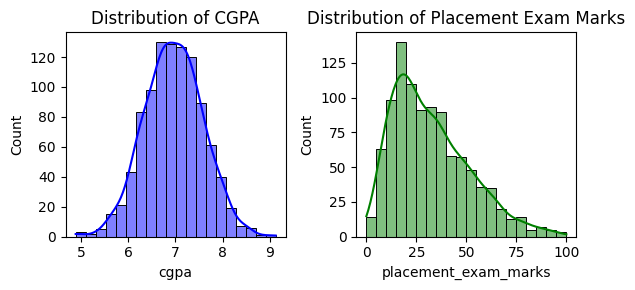

cgpa_lower_boundary= 5.113546374602832
cgpa_upper_boundary= 8.808933625397168
     cgpa  placement_exam_marks  placed
485  4.92                  44.0       1
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
999  4.90                  10.0       1
     cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
991  7.04                  57.0       0
992  6.26                  12.0       0
993  6.73                  21.0       1
994  6.48                  63.0       0
998  8.62                  46.0       1

[995 rows x 3 columns]
     cgpa  placement_exam_marks  placed  cgpa_z_score
0    7.19                  26.0       1      0.371425
1    7.46                  38.0       1      0.809810
2    7.54       

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

#1) Data ingestion 
df=pd.read_csv('placement.csv')
df.sample(3)

#2) Ploting the KDE plot 
plt.figure(figsize=(6,3))
plt.subplot(121)  # 1 row, 2 columns, 1st plot
sns.histplot(df['cgpa'], kde=True, bins=20, color='blue')
plt.title('Distribution of CGPA')

plt.subplot(122)  # 1 row, 2 columns, 2nd plot
sns.histplot(df['placement_exam_marks'], kde=True, bins=20, color='green')
plt.title('Distribution of Placement Exam Marks')

plt.tight_layout()  # Adjusts the spacing between plots
plt.show()

#3) Finding boundary values 
#---NOte since only CGPA is following Normal Dist hence it trated here 
lower_boundary= df['cgpa'].mean()-3*df['cgpa'].std()
upper_boundary= df['cgpa'].mean()+3*df['cgpa'].std()
print("cgpa_lower_boundary=", lower_boundary)
print("cgpa_upper_boundary=", upper_boundary)

#4) Finding the outliers 
outliers=df[(df['cgpa']<lower_boundary) | (df['cgpa']>upper_boundary)]
print(outliers)

#5)Treatment of outliers
#5.1)Trimming approach 
#-----Approch-1
df_new=df[(df['cgpa']<upper_boundary) & (df['cgpa']>lower_boundary)]
print(df_new)
# -----Approach-2: Using Z-Score 
df['cgpa_z_score']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df.head()
df_new=df[(df['cgpa_z_score']<3) & (df['cgpa_z_score']>-3)]
print(df_new)

#5.2) Capping   logic np.where(cond, if true then value, if false then value)
df['cgpa']= np.where(
    df['cgpa']>upper_boundary, 
    upper_boundary, 
    np.where(
        df['cgpa']<lower_boundary,
        lower_boundary,
        df['cgpa']
    )
)
df


<h2 style="color:gold; text-align:left; font-size:200%; font-weight:bold;">
2) IQR Method</h2>

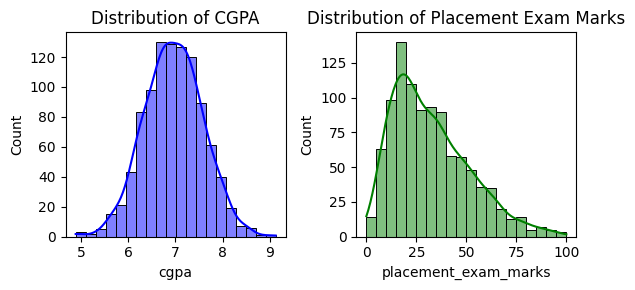

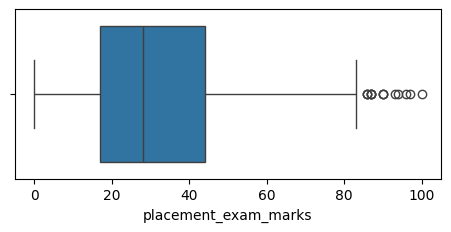

cgpa_lower_boundary= -23.5
cgpa_upper_boundary= 84.5
     cgpa  placement_exam_marks  placed
9    7.75                  94.0       1
40   6.60                  86.0       1
61   7.51                  86.0       0
134  6.33                  93.0       0
162  7.80                  90.0       0
283  7.09                  87.0       0
290  8.38                  87.0       0
311  6.97                  87.0       1
324  6.64                  90.0       0
630  6.56                  96.0       1
685  6.05                  87.0       1
730  6.14                  90.0       1
771  7.31                  86.0       1
846  6.99                  97.0       0
917  5.95                 100.0       0
     cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  

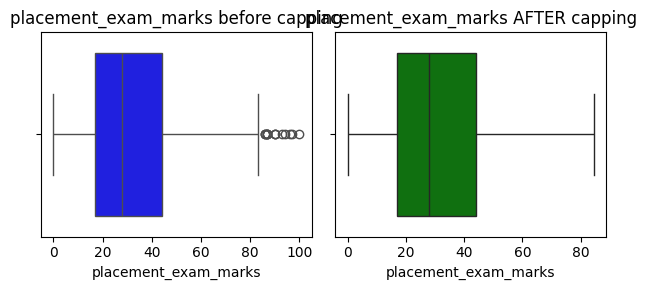

In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

#1) Data ingestion 
df=pd.read_csv('placement.csv')
df.sample(3)

#2) Ploting the KDE plot 
plt.figure(figsize=(6,3))
plt.subplot(121)  # 1 row, 2 columns, 1st plot
sns.histplot(df['cgpa'], kde=True, bins=20, color='blue')
plt.title('Distribution of CGPA')

plt.subplot(122)  # 1 row, 2 columns, 2nd plot
sns.histplot(df['placement_exam_marks'], kde=True, bins=20, color='green')
plt.title('Distribution of Placement Exam Marks')

plt.tight_layout()  # Adjusts the spacing between plots
plt.show()

#Plot the box plot for placement_exam_marks 
plt.figure(figsize=(5.5,2.2))
sns.boxplot(df['placement_exam_marks'], orient='h')
plt.show()

#3) Finding boundary values 
#---Note: Placemet_exam_mars is skewed hence it trated here 
Q1=df['placement_exam_marks'].quantile(0.25)
Q3=df['placement_exam_marks'].quantile(0.75)
IQR=Q3-Q1

lower_boundary= Q1-1.5*IQR
upper_boundary= Q3+1.5*IQR
print("cgpa_lower_boundary=", lower_boundary)
print("cgpa_upper_boundary=", upper_boundary)

#4) Finding the outliers 
outliers=df[(df['placement_exam_marks']<lower_boundary) | (df['placement_exam_marks']>upper_boundary)]
print(outliers)

#5)Treatment of outliers
#5.1)Trimming approach 
df_new=df[(df['placement_exam_marks']<upper_boundary) & (df['placement_exam_marks']>lower_boundary)]
print(df_new)

#5.2) Capping   logic np.where(cond, if true then value, if false then value)
df_capped=df.copy()
df_capped['placement_exam_marks']= np.where(
    df_capped['placement_exam_marks']>upper_boundary, 
    upper_boundary, 
    np.where(
        df_capped['placement_exam_marks']<lower_boundary,
        lower_boundary,
        df_capped['placement_exam_marks']
    )
)
# Now plot the Box plot before and after cappeing 
plt.figure(figsize=(6,3))
plt.subplot(121) 
sns.boxplot(df['placement_exam_marks'],orient='h', color='blue')
plt.title('placement_exam_marks before capping')

plt.subplot(122) 
sns.boxplot(df_capped['placement_exam_marks'],orient='h', color='green')
plt.title('placement_exam_marks AFTER capping')

plt.tight_layout()  # Adjusts the spacing between plots
plt.show()


<h2 style="color:gold; text-align:left; font-size:200%; font-weight:bold;">
3) Percentile Method</h2>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


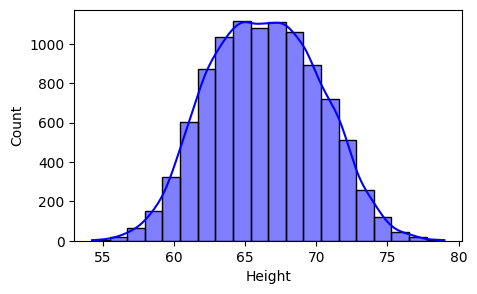

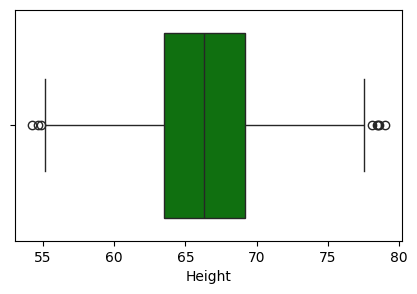

(200, 3)
      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[9800 rows x 3 columns]


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#1)Data ingetions
df=pd.read_csv('weight_height.csv')
df.info()
df.describe()

#2) visualisation: KDE plot to check the normality 
plt.figure(figsize=(5, 3))
sns.histplot(df['Height'], kde=True, bins=20, color='blue')
plt.show()

#For checking the outliers: plot box plot 
plt.figure(figsize=(5, 3))
sns.boxplot(df['Height'], orient='h', color='green')
plt.show()
#3) Setting threshold and defining boundary values 
lower_boundary=df['Height'].quantile(0.01)
upper_boundary=df['Height'].quantile(0.99)
#4) Finding the outliers 
outliers=df[(df['Height']<lower_boundary)  | (df['Height']>upper_boundary)]
print(outliers.shape)
#5)Treating outliers: 
#5.1) Triming approach 
df_new=df[(df['Height']>lower_boundary)  & (df['Height']<upper_boundary)]
print(df_new)

#5.3) Capping 
df['Height']=np.where(
    df['Height']>upper_boundary, 
    upper_boundary, 
    np.where(
        df['Height']<lower_boundary, 
        lower_boundary,
        df['Height']
    )    
)
df
